In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

In [2]:
# Load dataset
file_path = "normalized_weather_data.csv"
df = pd.read_csv(file_path)

# Select relevant columns for geographical analysis
df_filtered = df[['latitude', 'longitude', 'temperature_celsius', 'humidity', 'wind_kph', 'precip_mm', 'country']].dropna()


In [3]:
continent_mapping = {
    "North America": ["USA", "Canada", "Mexico"],
    "South America": ["Brazil", "Argentina", "Chile", "Peru"],
    "Europe": ["Germany", "France", "UK", "Italy", "Spain"],
    "Africa": ["Nigeria", "South Africa", "Egypt", "Kenya"],
    "Asia": ["China", "India", "Japan", "Indonesia", "South Korea"],
    "Oceania": ["Australia", "New Zealand"]
}

In [4]:
def get_continent(country):
    for continent, countries in continent_mapping.items():
        if country in countries:
            return continent
    return "Other"
    

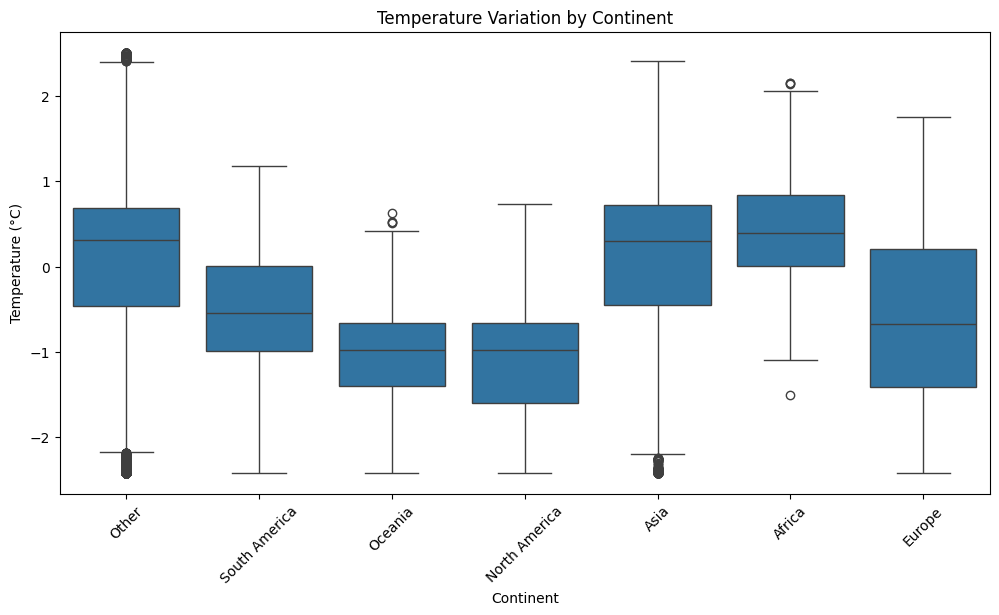

In [5]:
df_filtered['continent'] = df_filtered['country'].apply(get_continent)

plt.figure(figsize=(12, 6))
sns.boxplot(x='continent', y='temperature_celsius', data=df_filtered)
plt.xticks(rotation=45)
plt.title("Temperature Variation by Continent")
plt.xlabel("Continent")
plt.ylabel("Temperature (°C)")
plt.show()


/var/folders/73/vs0s7fbn46s474zlzwkq72bm0000gn/T/ipykernel_99251/681359484.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='country', y='humidity', data=country_avg_humidity, palette='Blues')


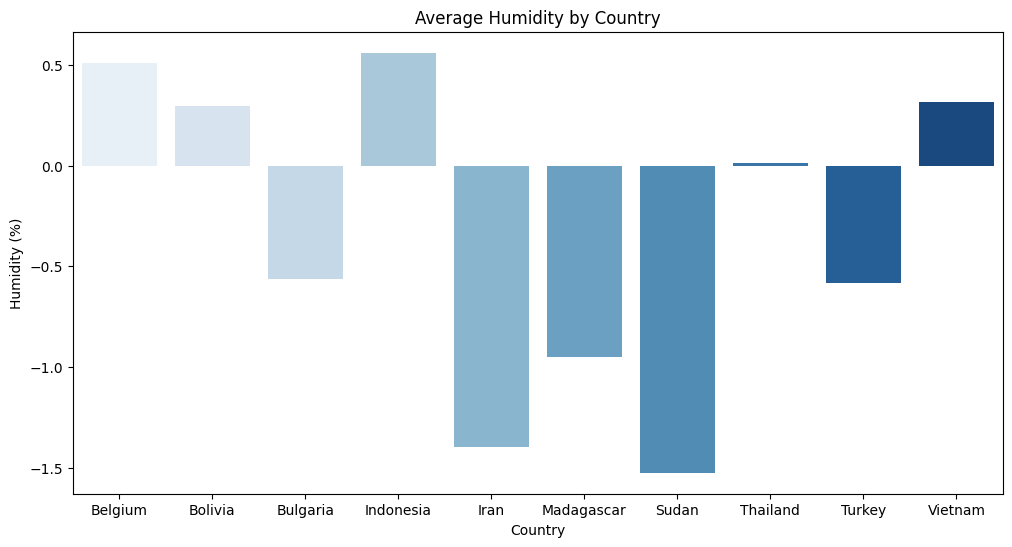

In [11]:
# Average Humidity by Country (Top 10 Countries with Most Data)
top_countries = df_filtered['country'].value_counts().index[:10]
df_top_countries = df_filtered[df_filtered['country'].isin(top_countries)]
country_avg_humidity = df_top_countries.groupby('country')['humidity'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='country', y='humidity', data=country_avg_humidity, palette='Blues')
plt.title("Average Humidity by Country")
plt.xlabel("Country")
plt.ylabel("Humidity (%)")
plt.show()

/var/folders/73/vs0s7fbn46s474zlzwkq72bm0000gn/T/ipykernel_99251/4198583910.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='continent', y='wind_kph', data=continent_avg_wind, palette='Greens')


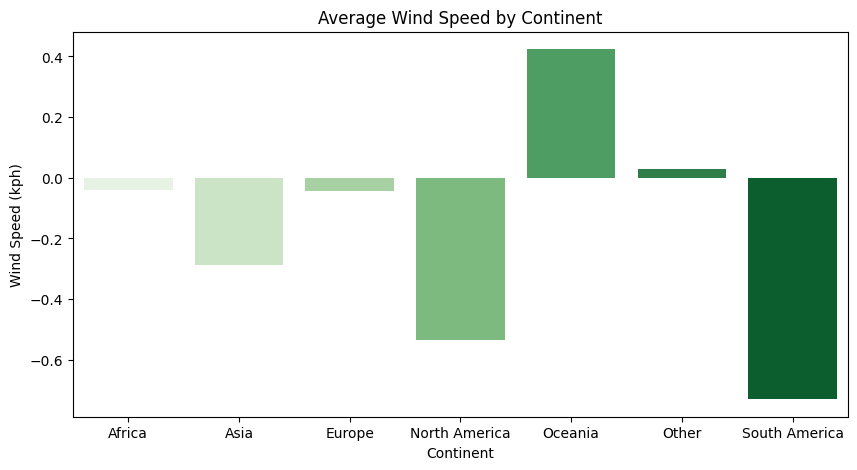

In [12]:
# Average Wind Speed by Continent
continent_avg_wind = df_filtered.groupby('continent')['wind_kph'].mean().reset_index()

plt.figure(figsize=(10, 5))
sns.barplot(x='continent', y='wind_kph', data=continent_avg_wind, palette='Greens')
plt.title("Average Wind Speed by Continent")
plt.xlabel("Continent")
plt.ylabel("Wind Speed (kph)")
plt.show()

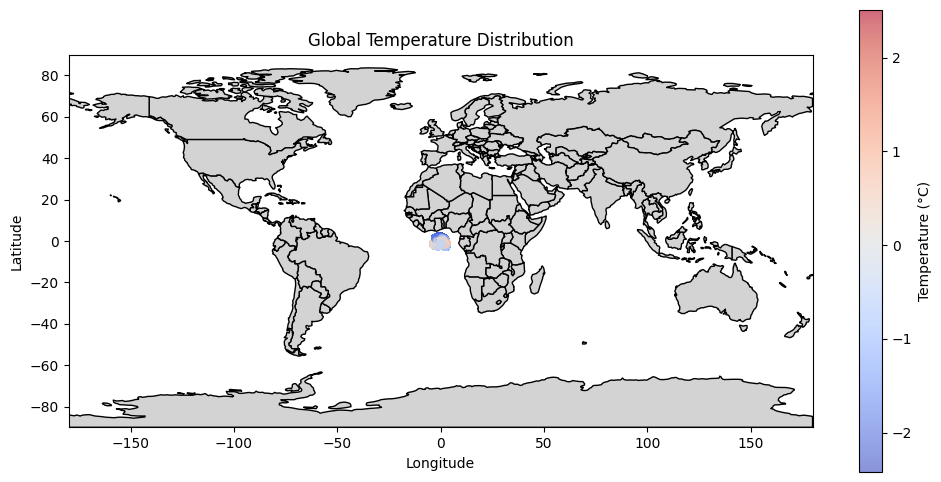

In [13]:
# Global Weather Map with Temperature Overlay
world = gpd.read_file("https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_countries.zip")
fig, ax = plt.subplots(figsize=(12, 6))
world.plot(ax=ax, color='lightgrey', edgecolor='black')
sc = ax.scatter(df_filtered['longitude'], df_filtered['latitude'], c=df_filtered['temperature_celsius'], cmap='coolwarm', alpha=0.6)
cbar = plt.colorbar(sc, ax=ax, label='Temperature (°C)')
ax.set_xlim([-180, 180])
ax.set_ylim([-90, 90])
plt.title("Global Temperature Distribution")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()